# Лабораторна робота №1
### Варіант 23(11)

In [1]:
from typing import List, Tuple
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

pred = {}
coeff = {}

In [2]:
x = [2.1, 2.84 ,3.21, 3.96,4.86, 6.06, 7.47, 9.25]
y = [1.00, 1.64, 2.28, 2.91, 3.56, 4.29, 4.84, 5.48]

In [3]:
def plot_regression(regressions: List[Tuple[str, List[float]]] = []):
    plt.plot(x, y, 'o', label='дані')
    for r in regressions:
        plt.plot(x, r[1], label=r[0])
    plt.xlabel('x')
    plt.ylabel('y')
    title = regressions[0][0] if len(regressions) == 1 else 'дата сет'
    plt.title(title)
    plt.legend()
    plt.show()

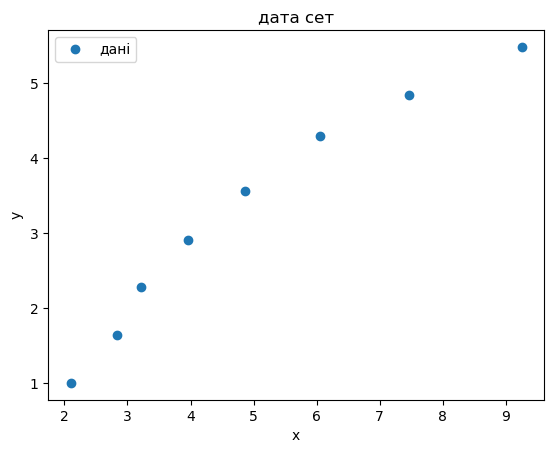

In [4]:
plot_regression()

### Первірка залежності х та у

In [5]:
cor = np.corrcoef(x, y)
print(f'коефіцієнт кореляції: {cor[0][1]}')

коефіцієнт кореляції: 0.9750107444317592


### Лінійна регресія

In [6]:
def linear_regression(x, y):
    M_x = np.mean(x)
    M_x2 = np.mean([i**2 for i in x])

    M_y = np.mean(y)
    M_xy = np.mean([x[i]*y[i] for i in range(len(x))])

    a = (M_xy - M_x*M_y)/(M_x2 - M_x**2)
    b = M_y - a*M_x
    return a, b

In [7]:
a, b = linear_regression(x, y)
print(f'рівняння лінійної регресії: y = {a}x + {b}')
coeff['лінійна'] = (a, b)

рівняння лінійної регресії: y = 0.6225092716933596x + 0.15690705627361945


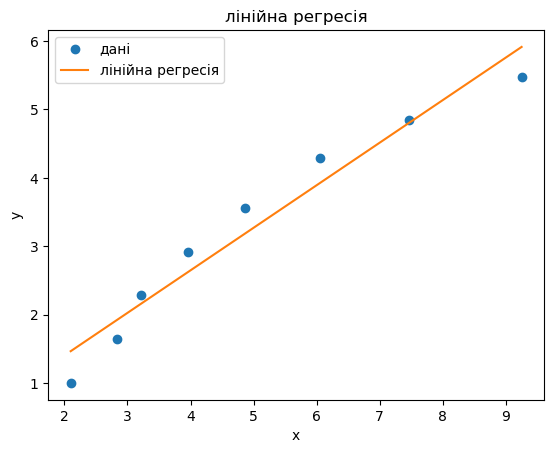

In [8]:
y_pred = [a * xi + b for xi in x]
pred['лінійна'] = y_pred
plot_regression([('лінійна регресія', y_pred)])

### Квадратична регресія

In [9]:
def quad_regression(x, y):
    M_x = np.mean(x)
    M_x2 = np.mean([i**2 for i in x])
    M_y = np.mean(y)
    M_xy = np.mean([x[i]*y[i] for i in range(len(x))])
    M_x3 = np.mean([i**3 for i in x])
    M_x4 = np.mean([i**4 for i in x])
    M_x2y = np.mean([x[i]**2*y[i] for i in range(len(x))])

    A = np.array([
        [M_x4, M_x3, M_x2],
        [M_x3, M_x2, M_x],
        [M_x2, M_x, 1]
    ])
    B = np.array([M_x2y, M_xy, M_y])
    a, b, c = np.linalg.solve(A, B)
    return a, b, c

In [10]:
a, b, c = quad_regression(x, y)
print(f'рівняння квадратичної регресії: y = {a}x^2 + {b}x + {c}')
coeff['квадратична'] = (a, b, c)

рівняння квадратичної регресії: y = -0.06716935713712138x^2 + 1.3776992414875022x + -1.5789526751444696


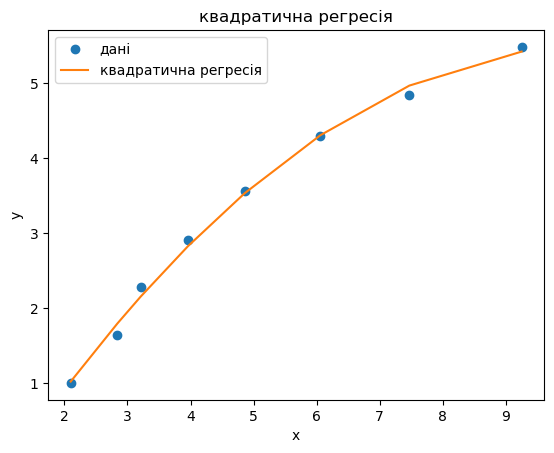

In [11]:
y_pred = [a * xi**2 + b*xi + c for xi in x]
pred['квадратична'] = y_pred
plot_regression([('квадратична регресія', y_pred)])

### Степенева регресія

In [12]:
x_ln = np.log(x)
y_ln = np.log(y)

a, b = linear_regression(x_ln, y_ln)
b = np.exp(b)
print(f'рівняння степеневої регресії\n a={a} b={b}\n y = {b}x^{a}')
coeff['степенева'] = (a, b)

рівняння степеневої регресії
 a=1.1176649517993742 b=0.5378692413874646
 y = 0.5378692413874646x^1.1176649517993742


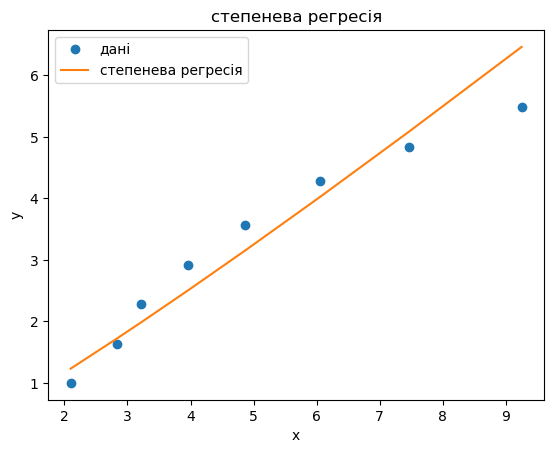

In [13]:
y_pred = [b * xi**a for xi in x]
pred['степенева'] = y_pred
plot_regression([('степенева регресія', y_pred)])

### Показникова регресія

In [14]:
y_ln = [np.log(i) for i in y]
a, b = linear_regression(x, y_ln)
print(f'рівняння показникової регресії\n a={a} b={b}\n y = {np.exp(b)}e^({a}*x)')
coeff['показникова'] = (a, b)

рівняння показникової регресії
 a=0.21326955766333683 b=-0.010796631454931482
 y = 0.9892614429797908e^(0.21326955766333683*x)


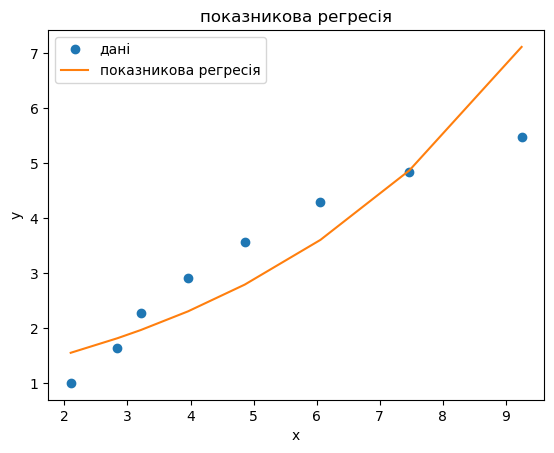

In [15]:
y_pred = [np.exp(b) * np.exp(a*xi) for xi in x]
pred['показникова'] = y_pred
plot_regression([('показникова регресія', y_pred)])

### Логарифмічна регресія

In [16]:
x_ln = [np.log(i) for i in x]

a, b = linear_regression(x_ln, y)

print(f'рівняння логарифмічної регресії\n a={a} b={b}\n y = {a}ln(x) + ({b})')
coeff['логарифмічна'] = (a, b)

рівняння логарифмічної регресії
 a=3.1085771169448186 b=-1.392086060605246
 y = 3.1085771169448186ln(x) + (-1.392086060605246)


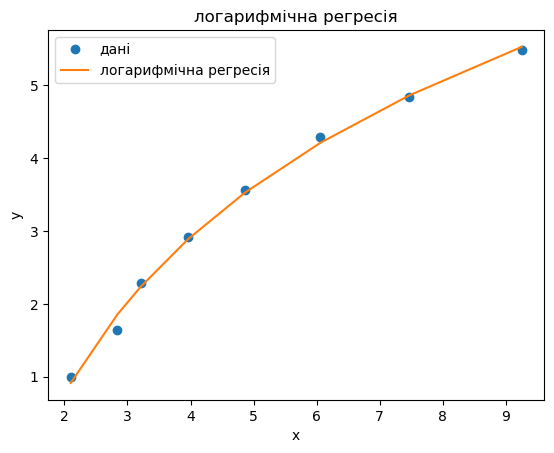

In [17]:
y_pred = [a * np.log(xi) + b for xi in x]
pred['логарифмічна'] = y_pred
plot_regression([('логарифмічна регресія', y_pred)])

### Гіперболічна регресія

In [18]:
x_rev = [1/i for i in x]

a, b = linear_regression(x_rev, y)

print(f'рівняння гіперболічної регресії\n a={a} b={b}\n y = {a}/x + {b}')
coeff['гіперболічна'] = (a, b)

рівняння гіперболічної регресії
 a=-12.359710829662443 b=6.347821885190981
 y = -12.359710829662443/x + 6.347821885190981


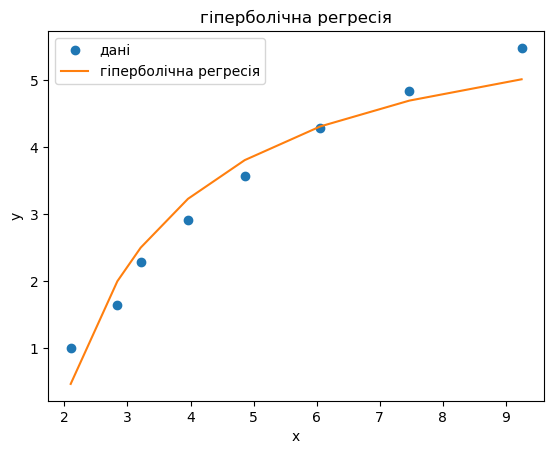

In [19]:
y_pred = [a / xi + b for xi in x]
pred['гіперболічна'] = y_pred
plot_regression([('гіперболічна регресія', y_pred)])

## Оцінка результатів

### Коефіцієнти регресії

In [20]:
coeff_df = pd.DataFrame.from_dict(coeff, orient='index', columns=['a', 'b', 'c']).fillna("")
coeff_df.to_excel('coeff.xlsx')
coeff_df

,a,b,c
лінійна,0.622509,0.156907,
квадратична,-0.067169,1.377699,-1.578953
степенева,1.117665,0.537869,
показникова,0.213270,-0.010797,
логарифмічна,3.108577,-1.392086,
гіперболічна,-12.359711,6.347822,


### Порівняння графіків

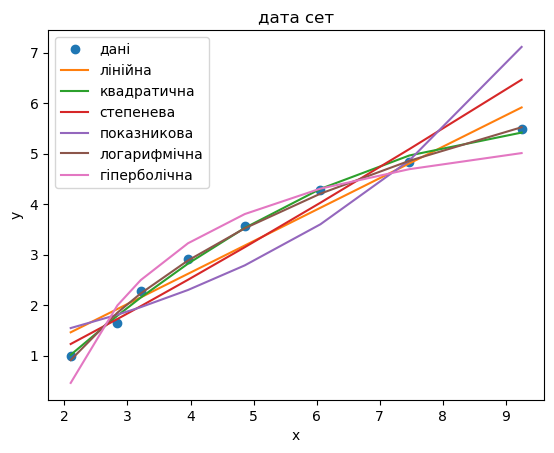

In [21]:
pred_array = list(pred.items())
plot_regression(pred_array)

### Коефіцієнт детермінації

In [22]:
pred_df = pd.DataFrame.from_dict(pred, orient='index')
pred_df.columns = x

determination_df = pd.DataFrame(columns=['лінійна', 'квадратична', 'степенева', 'показникова', 'логарифмічна', 'гіперболічна']).T
determination_df['R^2'] = [sum((y - pred_df.iloc[i])**2)/sum((y - np.average(y))**2) for i in range(len(pred_df))]
determination_df.to_excel('determination.xlsx')
determination_df

,R^2
лінійна,0.049354
квадратична,0.003904
степенева,0.091097
показникова,0.260868
логарифмічна,0.003770
гіперболічна,0.049710
